In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('data/MobilePriceClassification/MobilePriceClassification.csv', encoding='utf-8')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

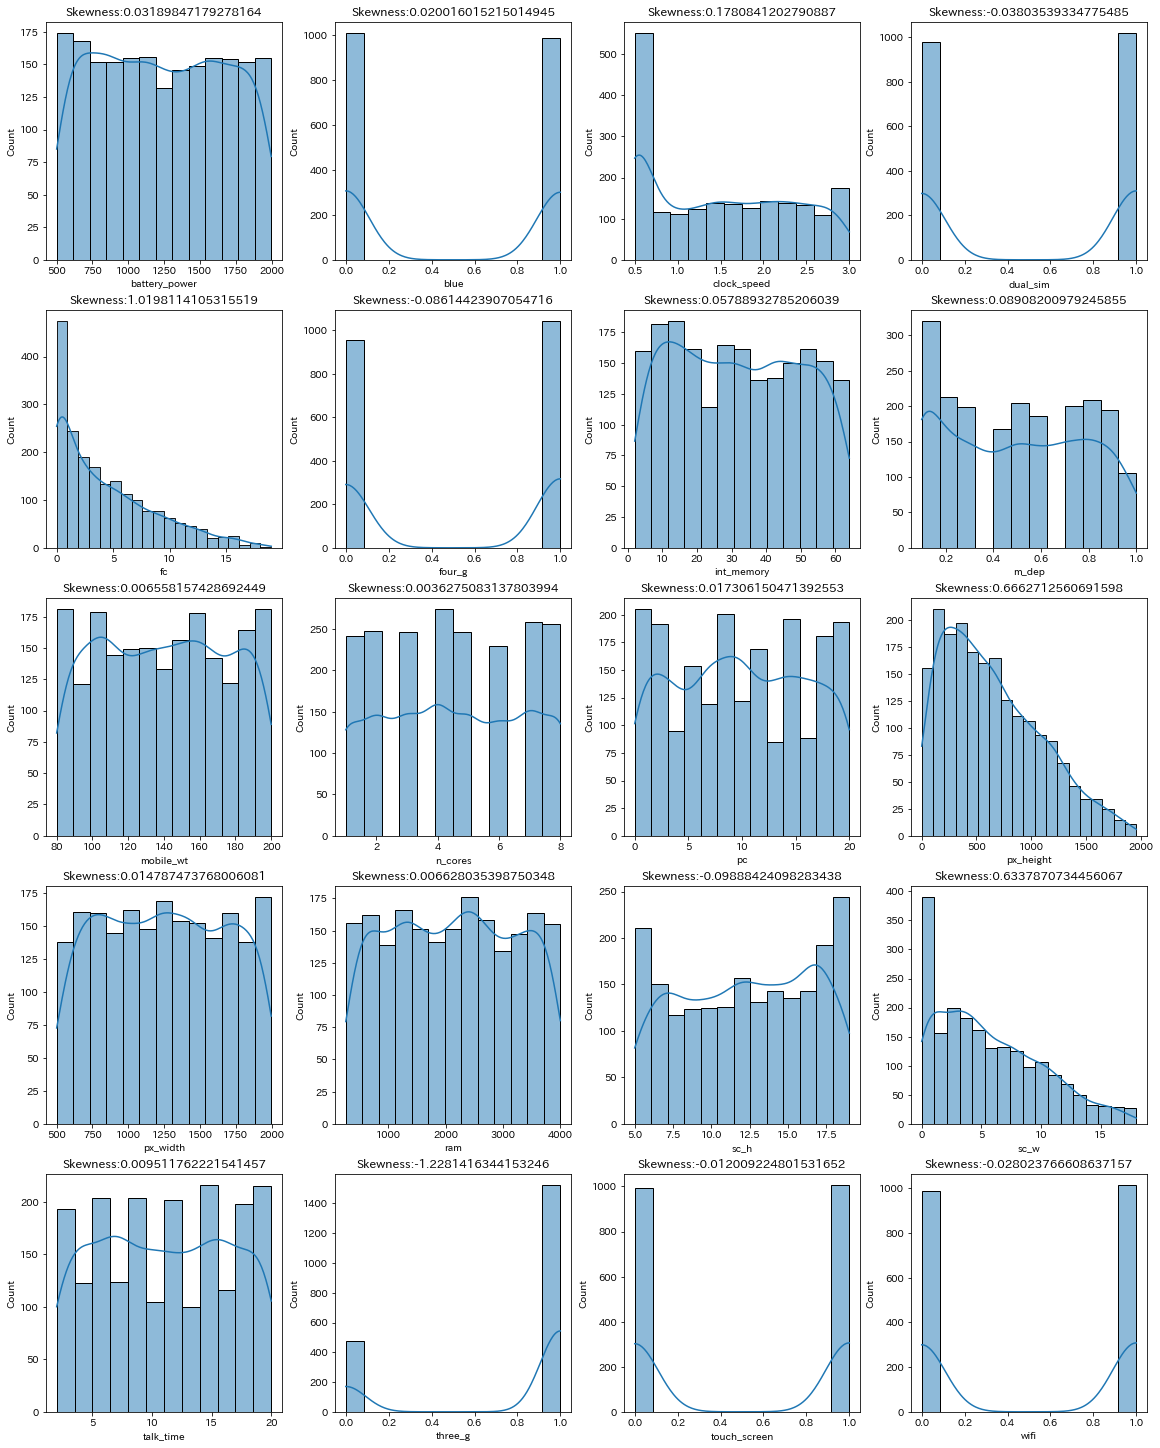

In [8]:
fig,ax=plt.subplots(5,4, figsize=(16,20),constrained_layout=True)
ax=ax.ravel()

for index, col in enumerate(df.dtypes[df.dtypes != 'object'].index[:-1]):
    sns.histplot(x=col,data=df,ax=ax[index],
               kde=True)
    ax[index].set_title(f'Skewness:{df[col].skew(axis = 0)}')

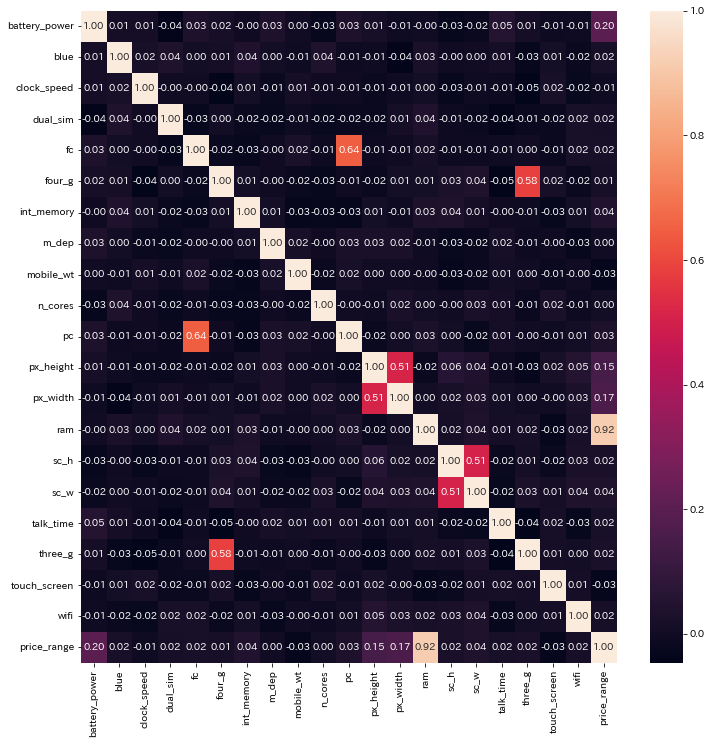

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [11]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


In [12]:
models = [linear_model.LogisticRegression(),
          neighbors.KNeighborsClassifier(),
          svm.SVC(),
          naive_bayes.GaussianNB(),
          tree.DecisionTreeClassifier(max_depth=3),
          ensemble.RandomForestClassifier(max_depth=3),
          ensemble.GradientBoostingClassifier()]

In [14]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

C:\Users\ishih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.635000,0.635000,0.635000,0.635000,0.6375,0.6375,0.6375,0.6375
1,KNeighborsClassifier,0.953125,0.953125,0.953125,0.953125,0.9225,0.9225,0.9225,0.9225
2,SVC,0.960000,0.960000,0.960000,0.960000,0.9450,0.9450,0.9450,0.9450
3,GaussianNB,0.816875,0.816875,0.816875,0.816875,0.7775,0.7775,0.7775,0.7775
4,DecisionTreeClassifier,0.773750,0.773750,0.773750,0.773750,0.7525,0.7525,0.7525,0.7525
5,RandomForestClassifier,0.863750,0.863750,0.863750,0.863750,0.8450,0.8450,0.8450,0.8450
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,0.9200,0.9200,0.9200,0.9200


In [16]:
from sklearn.preprocessing import StandardScaler

scaling_columns = X_train.dtypes[X_train.dtypes != 'uint8'].index
scaler = StandardScaler().fit(X_train[scaling_columns])

scaled_train = pd.DataFrame(scaler.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(scaler.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [17]:
df_model_comp = pd.DataFrame()
for model in models:
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
df_model_comp

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.975000,0.975000,0.975000,0.975000,0.9650,0.9650,0.9650,0.9650
1,KNeighborsClassifier,0.707500,0.707500,0.707500,0.707500,0.4925,0.4925,0.4925,0.4925
2,SVC,0.988125,0.988125,0.988125,0.988125,0.8675,0.8675,0.8675,0.8675
3,GaussianNB,0.817500,0.817500,0.817500,0.817500,0.7775,0.7775,0.7775,0.7775
4,DecisionTreeClassifier,0.773750,0.773750,0.773750,0.773750,0.7525,0.7525,0.7525,0.7525
5,RandomForestClassifier,0.861250,0.861250,0.861250,0.861250,0.8250,0.8250,0.8250,0.8250
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,0.9200,0.9200,0.9200,0.9200


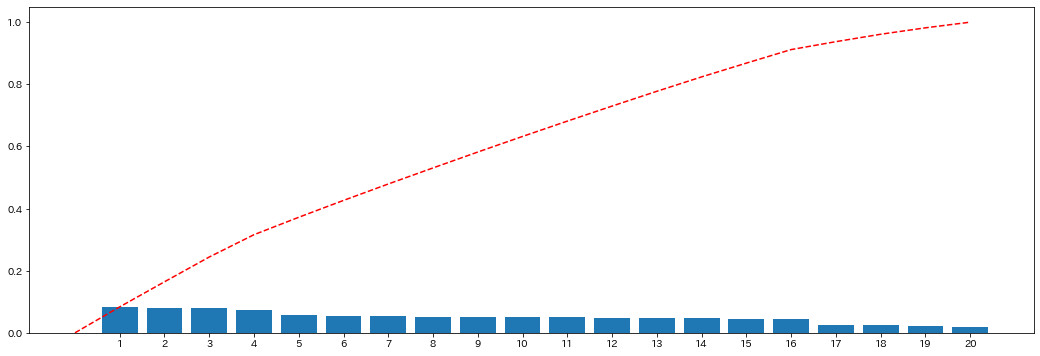

In [18]:
plt.figure(figsize=(18,6))
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio, color='red', linestyle='dashed')
plt.xticks(range(1, X_train.shape[-1]+1))
plt.show()

In [19]:
n = 13
columns=[f'PC{i+1}' for i in range(n)]
X_train_pca = pd.DataFrame(X_train_pca[:,:n], columns=columns)
X_test_pca = pd.DataFrame(X_test_pca[:,:n], columns=columns)

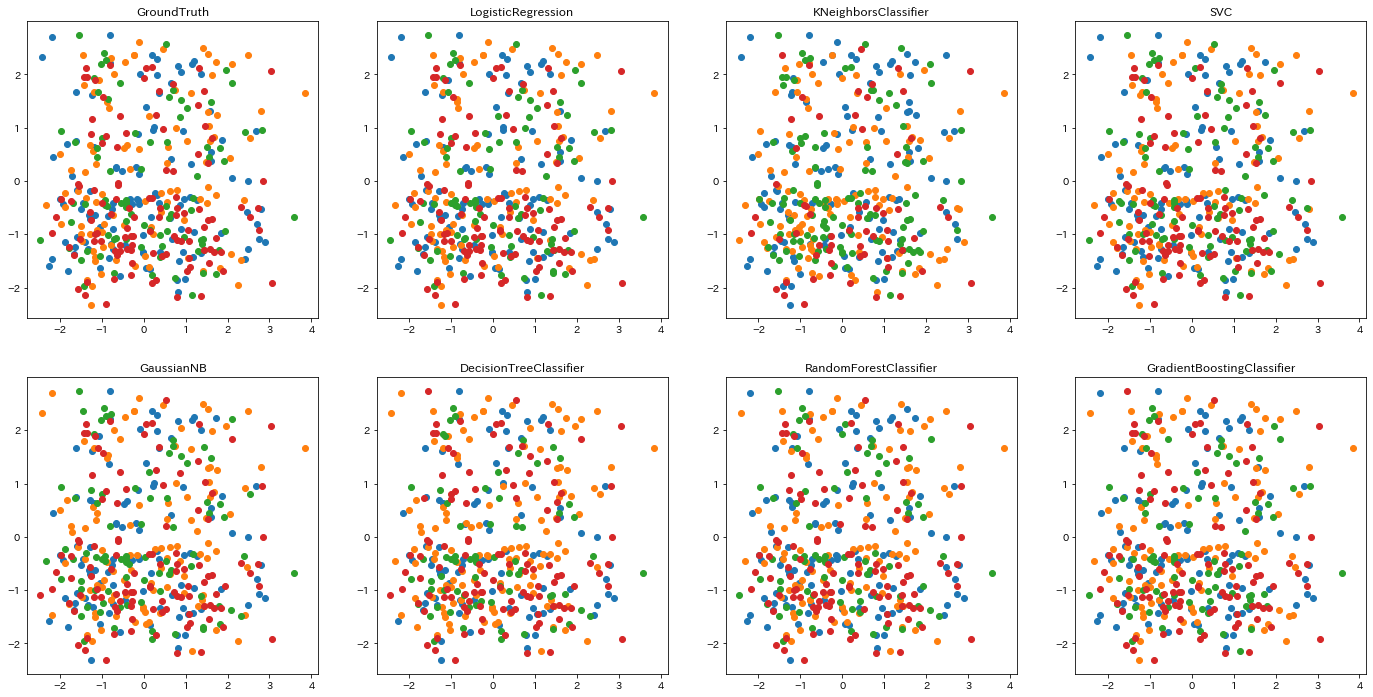

,モデル名,Accuracy(訓練),Precision(訓練),Recall(訓練),F1(訓練),Accuracy(テスト),Precision(テスト),Recall(テスト),F1(テスト)
0,LogisticRegression,0.975000,0.975000,0.975000,0.975000,0.9650,0.9650,0.9650,0.9650
1,KNeighborsClassifier,0.707500,0.707500,0.707500,0.707500,0.4925,0.4925,0.4925,0.4925
2,SVC,0.988125,0.988125,0.988125,0.988125,0.8675,0.8675,0.8675,0.8675
3,GaussianNB,0.817500,0.817500,0.817500,0.817500,0.7775,0.7775,0.7775,0.7775
4,DecisionTreeClassifier,0.773750,0.773750,0.773750,0.773750,0.7525,0.7525,0.7525,0.7525
5,RandomForestClassifier,0.852500,0.852500,0.852500,0.852500,0.8250,0.8250,0.8250,0.8250
6,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,0.9200,0.9200,0.9200,0.9200


In [20]:
df_model_comp = pd.DataFrame()

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24.0,12.0))
ax = ax.flatten()
for j in np.unique(y_test):
    X_tmp = X_test_pca[y_test.values == j]
    ax[0].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
ax[0].set_title('GroundTruth')

for i, model in enumerate(models):
    dic = dict()
    dic['モデル名'] = model.__class__.__name__
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    dic['Accuracy(訓練)'] = metrics.accuracy_score(y_train, y_pred)
    dic['Precision(訓練)'] = metrics.precision_score(y_train, y_pred, average='micro')
    dic['Recall(訓練)'] = metrics.recall_score(y_train, y_pred, average='micro')
    dic['F1(訓練)'] = metrics.f1_score(y_train, y_pred, average='micro')
    y_pred = model.predict(X_test)
    dic['Accuracy(テスト)'] = metrics.accuracy_score(y_test, y_pred)
    dic['Precision(テスト)'] = metrics.precision_score(y_test, y_pred, average='micro')
    dic['Recall(テスト)'] = metrics.recall_score(y_test, y_pred, average='micro')
    dic['F1(テスト)'] = metrics.f1_score(y_test, y_pred, average='micro')
    df_model_comp = df_model_comp.append(dic,ignore_index=True)
    for j in np.unique(y_pred):
        X_tmp = X_test_pca[y_pred == j]
        ax[i+1].scatter(X_tmp['PC1'], X_tmp['PC2'], label=j)
    ax[i+1].set_title(model.__class__.__name__)
plt.show()

df_model_comp